# Blob Detection
###### by: João Ataíde
---

In [2]:
def exportar_amostras(output_samples,  imagem, anotations, roi, parallelProcessing, metadata_samples,
                      columns_class, stride = 256, size = 128, rotation = 30)

    print(f"================================================= EXPORTANDO AMOSTRAS =================================================")

    with arcpy.EnvManager(parallelProcessingFactor = parallelProcessing):
        arcpy.ia.ExportTrainingDataForDeepLearning(imagem, output_samples, anotations, "TIFF", stride, stride, size, size,
                                                   "ONLY_TILES_WITH_FEATURES", metadata_samples, 0, columns_class, 0,
                                                   roi, rotation, "MAP_SPACE", "PROCESS_AS_MOSAICKED_IMAGE", "NO_BLACKEN",
                                                   "FIXED_SIZE", None, None, None, 0)

    print(f"============================================= PROCESSAMENTO  FINALIZADO =============================================")

SyntaxError: expected ':' (1807952750.py, line 2)

In [1]:
#Importando as bibliotecas
import cv2, time
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

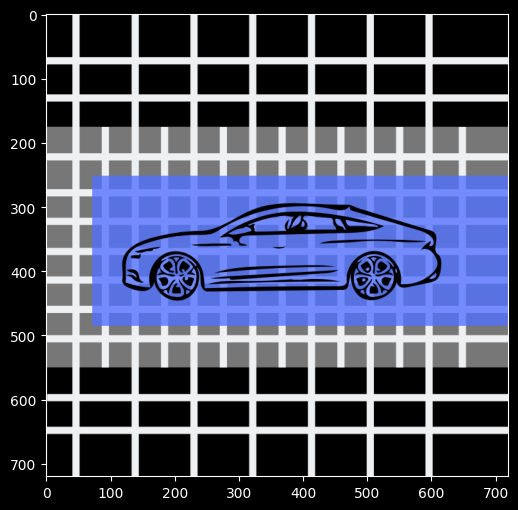

In [2]:
DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w3 - Binary Image Processing\data"

imagePath = f"{DATA_PATH}\\images\\Quiz-1-Assets.png"
im = cv2.imread(imagePath)
plt.imshow(im[:,:,::-1]);

In [ ]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

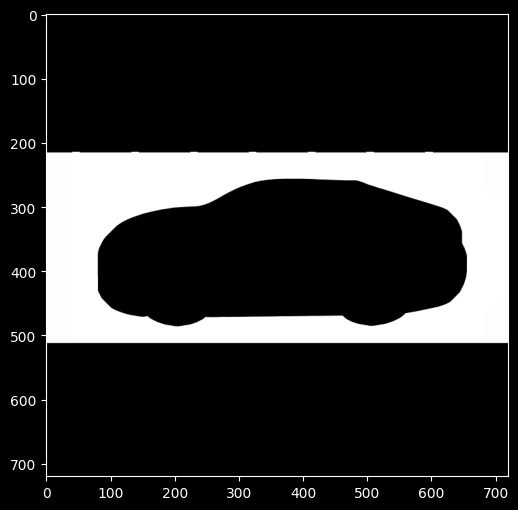

In [62]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))
image_eroded = cv2.erode(gray, element, iterations = 2)
plt.imshow(image_eroded );

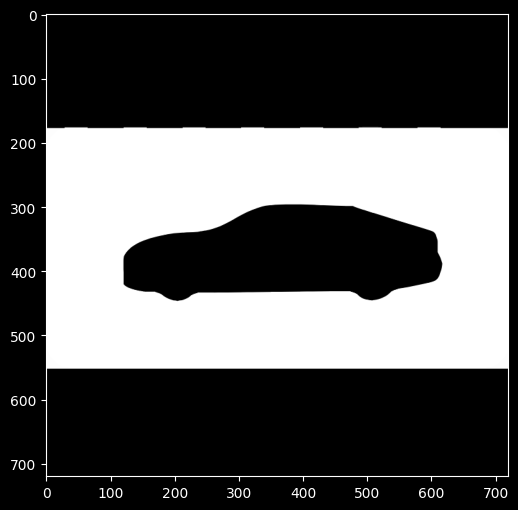

In [64]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))
image_dilated = cv2.dilate(image_eroded, element, iterations=2)
plt.imshow(image_dilated);

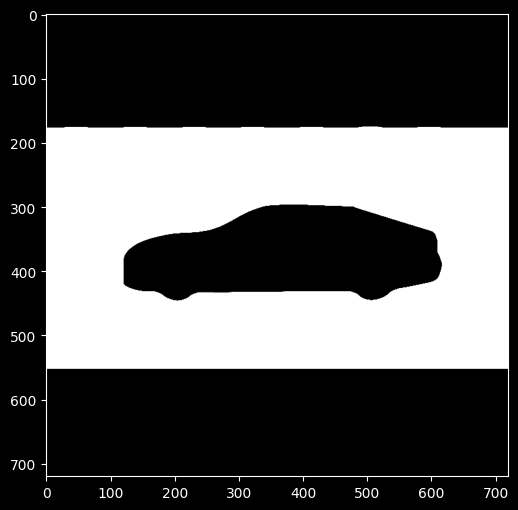

In [82]:
thr, inter_img = cv2.threshold(image_dilated, 10, 255, cv2.THRESH_TRUNC)
plt.imshow(inter_img);

In [183]:
contours, hierarchy = cv2.findContours(inter_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [192]:
h, w = im.shape[:2]
mask = np.zeros((h, w), np.uint8)
mask_ones = np.ones((h, w), np.uint8)

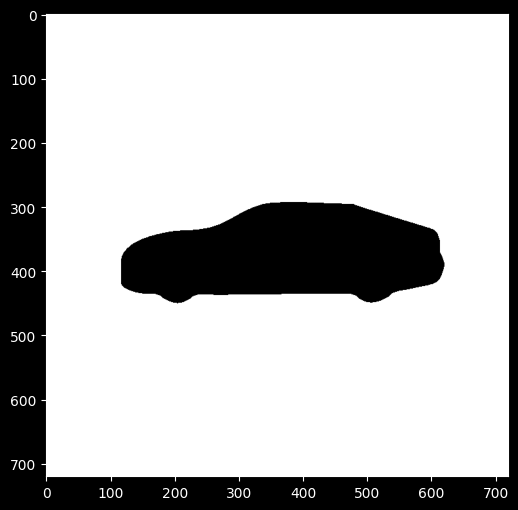

In [204]:
image_mask = cv2.drawContours(mask_ones, contours, 1, (255, 255, 255), thickness = -1)
image_mask = cv2.bitwise_not(image_mask)
plt.imshow(image_mask)
plt.show()

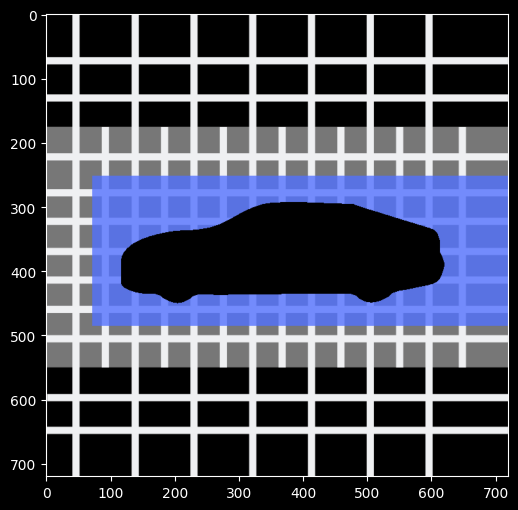

In [217]:
image = im.copy()
image= cv2.bitwise_and(image, image,  mask = image_mask)
plt.imshow(image[:,:,::-1])
plt.show()